# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Задачи проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости Санкт-Петербурга и Ленеградской области.


**Цель исследования:**
1. Определить рыночную стоимость квадртного метра недвижимсоти.
2. Найти и изучить данные по предложениям на рынке недвижимости, чтобы определить аномалии и мошеннические действия.
3. Провести исследования как быстро продавались квартиры.
4. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Ход исследования**

Данные о поведении пользователей я получил из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Я проверите данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки  буду искать инструменты для исправление самых критичных ошибок данных, которые могут привести к искажению конечного результата. Добавлю в таблицу новые столбцы для проведения исследования.
 
Таким образом, исследование пройдёт в три этапа:
 - Обзор данных.
 - Предобработка данных.
 - Изучение уникальные значения в столбцах и устраните неявные дубликаты
 - Устраните редких и выбивающиеся значения.
 - Добавление в таблицу новых данных.
 - Проведите исследовательский анализ данных рынка Ленеградской области.
 - Проведите исследовательский анализ данных рынка Санкт-Петербурга.
 - Определение факторов влияющих стоимость объекта.
 - Написание общего вывода по исследованию.

## Откройте файл с данными и изучите общую информацию. 

### Обзор данных

**Подключим библиотеки необходимые для работы**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Установим опции по выводу в датафрейме**

In [3]:
pd.set_option('display.max_colwidth', None) # для полноформатного отборажения таблиц
pd.set_option('display.float_format', '{:.2f}'.format) #все числа отражаются с двумя знаками после запятой

**Откроем файл**

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #Сохрояем в переменную data данные из csv-файла

**Посмотрим первые и последние 5 строк таблицы с данными**

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [6]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ознакомимся с типом данных и общей информацией по датафрейму

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


### Общая гистограмма для всех числовых столбцов датафрейма

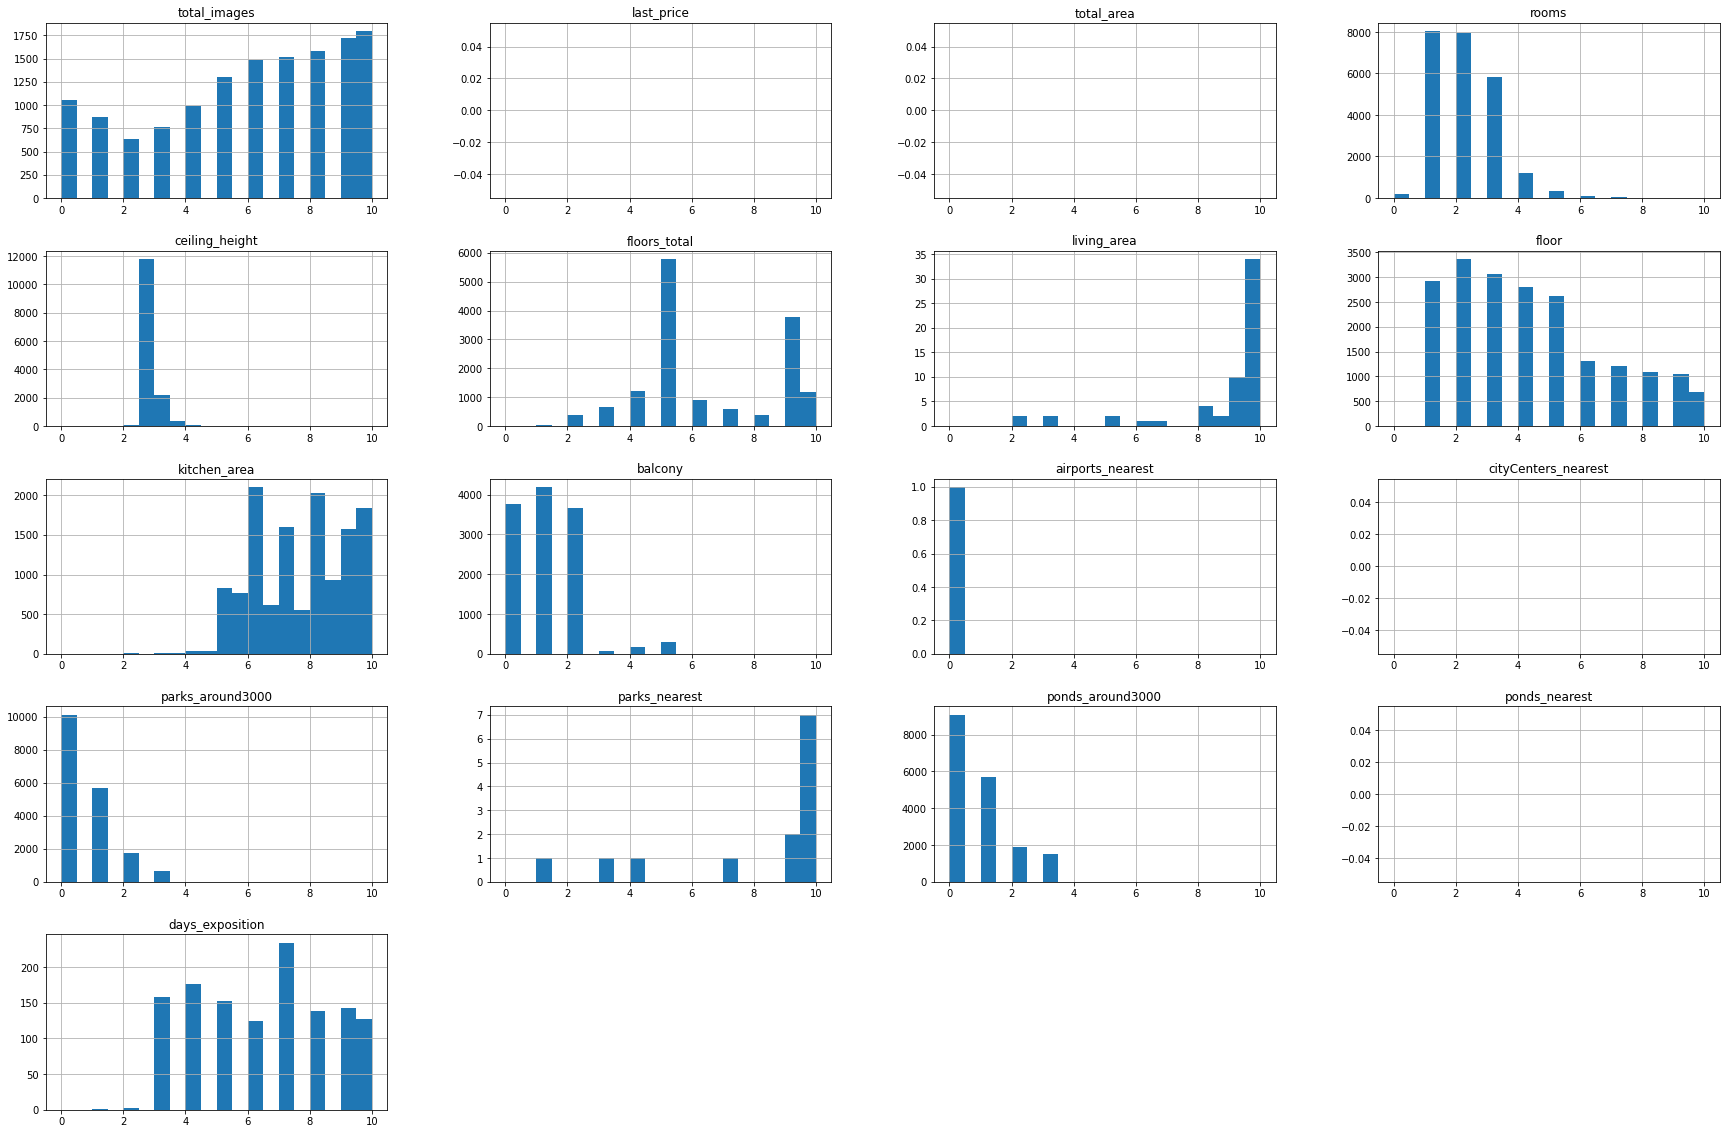

In [325]:
df.hist(figsize = [30, 20], bins = 20, grid= True, range=(0, 10)) 
plt.show()

**Выводы**

Судя по данным в датафрейме основное внимание необходимо будет уделить пропущенным/отсутствующим данным. Так же поработать с некоторые данными, которые сильно выбиваются из общей массы по значениям.

## Предобработка данных

**Посмотрим наименование столбцов**

In [326]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

**Приведём наименование столбцов в однотипный формат**

Нужно перевести названия в соответствие с хорошим стилем.

Переименовать стобцы:

'cityCenters_nearest' → 'city_centers_nearest';

'parks_around3000' → 'parks_around';

'ponds_around3000' → 'ponds_around';

In [327]:
df.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'}, inplace=True)

**Проверяем результат**

In [328]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

С наименованием стобцов теперь всё в порядке, переходим к данным.

###  Удаление пропусков и изменение типов данных.

Не все пропущенные значения влияют на исследование. Некоторые пропуски не важны для вашей работы. Некоторые достаточно заменить их явными обозначениями.

Но некторые пропуски могут помешать сравнению рынка недвижемости в Санкт-Петербурге. На практике было бы правильно установить причину пропусков и восстановить данные. Такой возможности нет в учебном проекте. Придётся:

-заполнить и эти пропуски явными обозначениями;

-оценить, насколько они повредят расчётам.

**Выполним исследование данных столбца "balcony"**

In [329]:
df['balcony'].isna().sum()

11519

Пропусков около 50% от всех данных, это говорит о том, что такие пропуски не могут быть случайны. Ознакомимся с данными по отсутствующим значениям в колонки "balcony".

In [330]:
df.loc[df['balcony'].isna()].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
10,5,5050000.00,39.60,2017-11-16T00:00:00,1,2.67,12.00,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.00,13878.00,1.00,310.00,2.00,553.00,137.00
16,11,6700000.00,82.00,2017-11-23T00:00:00,3,3.05,5.00,55.60,1,NaN,...,9.00,NaN,Санкт-Петербург,22108.00,10698.00,3.00,420.00,0.00,NaN,397.00
19,16,14200000.00,121.00,2019-01-09T00:00:00,3,2.75,16.00,76.00,8,NaN,...,12.00,NaN,Санкт-Петербург,38900.00,12843.00,0.00,NaN,0.00,NaN,97.00
23,11,2950000.00,32.00,2016-10-29T00:00:00,1,2.60,9.00,17.70,9,NaN,...,6.10,NaN,Санкт-Петербург,15414.00,14211.00,2.00,517.00,1.00,190.00,615.00
26,6,4050000.00,60.00,2017-04-28T00:00:00,4,NaN,5.00,43.00,4,NaN,...,7.00,NaN,Санкт-Петербург,11580.00,10510.00,0.00,NaN,1.00,95.00,265.00
30,12,2200000.00,32.80,2018-02-19T00:00:00,1,NaN,9.00,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.00


Судя по распределению данных, логично было бы предположить, что те данные которые имеют пропуск - это означает отсутствие балкона, таким образом можем указать 0 вместо NaN и приведём тип данных в целочисленный. 

In [331]:
df['balcony'] = df['balcony'].fillna(0).astype('int')

Проверяем результат удаления NaN значений

In [332]:
df['balcony'].isna().sum()

0

**Выполним исследование данных столбца "is_apartment"**

In [333]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Выведем данные для ознакомеления

In [334]:
df.loc[df['is_apartment'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN
23695,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00


Посчитаем данные на значения NaN 

In [335]:
df.query('is_apartment != True or is_apartment != False')['is_apartment'].count()

2775

Вероятно, что пропущенные значения означают, что аппартаменты не входят в предложение по продаже кваритр - выполним замену неизвестных данных на значение False и приведём тип данных в bool.

In [336]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим результат

In [337]:
df['is_apartment'].unique()

array([False,  True])

Выведем датафрейм и ознакомимся с данными после выполнения преобразований

In [338]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,False,...,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


**Выполним исследование данных столбца  "rooms"**

In [339]:
df.query('rooms == 0')['rooms'].count()

197

проверим по таблице, к каким данным относятся 0 комнат.

In [340]:
 df.query('rooms == 0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
144,1,2450000.00,27.00,2017-03-30T00:00:00,0,NaN,24.00,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00
349,4,2320000.00,25.00,2017-09-27T00:00:00,0,NaN,14.00,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00
440,8,2480000.00,27.11,2018-03-12T00:00:00,0,NaN,17.00,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
508,0,3375000.00,34.40,2017-03-28T00:00:00,0,NaN,26.00,24.30,19,False,...,NaN,1,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00
608,2,1850000.00,25.00,2019-02-20T00:00:00,0,NaN,10.00,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00
697,12,2500000.00,24.10,2017-12-01T00:00:00,0,2.75,25.00,17.50,21,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.00
716,5,1500000.00,17.00,2017-06-07T00:00:00,0,2.70,9.00,12.00,1,False,...,NaN,0,посёлок Шушары,18654.00,29846.00,0.00,NaN,0.00,NaN,40.00
780,9,2600000.00,26.10,2018-02-20T00:00:00,0,NaN,18.00,NaN,8,False,...,NaN,1,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00
839,14,1900000.00,35.00,2017-04-14T00:00:00,0,2.70,5.00,15.00,3,False,...,NaN,1,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.00
946,5,2200000.00,23.00,2016-09-27T00:00:00,0,NaN,27.00,18.00,7,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.00


Логично предположить, что с такой площадью и отсутствием площади кухни, 0 комнат означает, что это квартиры-студии. В стаком случае отсавим всё как есть, здесь ошибок в указании данных нет.

**Выполним исследование данных столбца "floors_total"**

In [341]:
df.loc[df['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,False,...,12.00,0,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,False,...,NaN,0,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,False,...,10.63,0,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,False,...,16.80,0,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,False,...,NaN,0,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
1930,1,9750000.00,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,False,...,NaN,0,Санкт-Петербург,39886.00,10660.00,1.00,2276.00,3.00,244.00,90.00
2392,7,5395770.00,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,False,...,9.00,0,Санкт-Петербург,43074.00,10820.00,0.00,NaN,0.00,NaN,48.00
2846,4,2325000.00,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,False,...,NaN,0,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,307.00
2952,10,6500000.00,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,False,...,12.30,0,Санкт-Петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,NaN
3031,9,6400000.00,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,False,...,12.00,0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.00


In [342]:
df['floors_total'].isna().sum()

86

In [343]:
df.dropna(subset=['floors_total'], inplace=True)

Из данной выборки видно только то, что невозможно по каким-либо остальным праметрам однозначно сказать об этажности дома. По-этому их лучше сразу удалить, чтобы сэкономить время.

**Выполним исследование данных столбца "living_area"**

In [344]:
df['living_area'].agg(['min','max','mean','median'])

min        2.00
max      409.70
mean      34.46
median    30.00
Name: living_area, dtype: float64

Выведем данные для визульного ознаколения, для каких квартир указаны такие значения по жилой площади:

In [345]:
df.query('living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
3242,7,4440000.00,41.00,2017-07-02T00:00:00,1,NaN,17.00,3.00,17,False,...,11.00,0,Санкт-Петербург,19272.00,13073.00,0.00,NaN,0.00,NaN,216.00
13915,20,6350000.00,52.00,2018-02-06T00:00:00,2,3.00,6.00,2.00,2,False,...,9.00,0,Санкт-Петербург,32453.00,6521.00,0.00,NaN,1.00,1012.00,91.00
21758,0,2330000.00,23.00,2018-01-01T00:00:00,0,NaN,24.00,2.00,22,False,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.00
23574,14,64990000.00,139.00,2015-11-24T00:00:00,3,3.00,8.00,3.00,8,False,...,16.00,1,Санкт-Петербург,33255.00,5975.00,1.00,630.00,3.00,100.00,280.00


Однозначно определить какое значение следует указать мы не можем, но ясно одно, что остальной массив данных лучше сохранить, по-этому заменим неправдоподобные значения на None.

In [346]:
df.loc[df['living_area'] < 5, 'living_area'] = None

In [347]:
df['living_area'].isna().sum()

1874

проверим результат применения None к выбранным строкам:

In [348]:
df.query('living_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


Неправдоподобные данные по площади жилого помещения устранены. К сожалению таких пропущенных значений в столбце много, но удалять строки с другими данными вредно для статистики, оставим строки с неизвестными площадями как есть.

**Выполним исследование данных столбца  "ceiling_height"**

In [349]:
df['ceiling_height'].isna().sum()

9118

Теперь заполним отсутствующие значения в столбце медианой величиной для населеного пунта, для сохранения статистики по остальным данным в других столбцах.

In [350]:
for locality_name in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality_name), 'ceiling _height'] = median

df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
warnings.filterwarnings("ignore")

Проверяем результат:

In [351]:
df['ceiling_height'].isna().sum()

0

**Выполним исследование данных столбца  "city_centers_nearest"**

In [352]:
df['city_centers_nearest'].isna().sum()

5509

Заполняем расстояние до центра в зависимости от населённого пункта. Если останутся пропуски, то будет некорректно до-заполнять их медианной. 

In [353]:
for locality_nane in df['locality_name'].unique():
    median = df.loc[df['locality_name'] == locality_name, 'city_centers_nearest'].median()
    df.loc[(df['city_centers_nearest'].isna()) & (df['locality_name'] == locality_name), 'city_centers_nearest'] = median

Проверяем результат:

In [173]:
df['city_centers_nearest'].isna().sum()

5509

**Выполним исследование данных столбца  "kitchen_area"**

Согласно Снип, кухня не может быть менее 5 м2. Выполним выборку по данному значению:

In [174]:
df.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height
76,12,2800000.00,55.10,2016-05-14T00:00:00,3,2.60,5.00,38.40,1,False,...,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,606.00,NaN
298,9,2650000.00,42.80,2017-04-25T00:00:00,2,2.65,5.00,30.00,3,False,...,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.00,2.55
422,8,1700000.00,55.20,2018-03-24T00:00:00,3,2.50,5.00,38.50,5,False,...,0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,15,2600000.00,27.00,2017-07-10T00:00:00,1,2.75,23.00,18.00,18,False,...,0,Санкт-Петербург,22131.00,17459.00,0.00,NaN,1.00,411.00,10.00,NaN
1327,6,2650000.00,46.20,2016-12-01T00:00:00,2,2.50,5.00,29.20,5,False,...,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,704.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22839,14,3350000.00,27.00,2018-11-03T00:00:00,1,2.70,16.00,NaN,6,False,...,2,Санкт-Петербург,41935.00,9551.00,0.00,NaN,0.00,NaN,35.00,NaN
22849,6,2380000.00,25.00,2016-03-22T00:00:00,1,2.65,25.00,19.00,15,False,...,1,посёлок Шушары,13461.00,19247.00,0.00,NaN,1.00,351.00,140.00,2.62
23110,1,2900000.00,34.00,2018-02-01T00:00:00,2,2.90,2.00,20.00,1,False,...,0,посёлок Стрельна,27006.00,23832.00,0.00,NaN,2.00,872.00,196.00,NaN
23498,7,1600000.00,54.00,2016-12-26T00:00:00,2,2.30,1.00,33.00,1,False,...,0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,281.00,NaN


In [175]:
df['kitchen_area'].isna().sum()

2231

Заполним пропуски в значениях нулевыми учитывая, что отсутствие данных о площади кухни связано с квартирами, где комнаты объеденины с кухней и площадь комнаты уже учитывает площадь кухни.

In [176]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

Вычислим среднее значение для кухни отсортировав "мусорные" значения.

In [177]:
mean_area = df.query('kitchen_area > 5' and 'kitchen_area < 15')['kitchen_area'].mean()

Заменим ошибочные данные средним значением нашей выборки.

In [178]:
df.loc[df['kitchen_area'] < 5, 'kitchen_area'] = mean_area

Проверяем результат.

In [179]:
df.query('kitchen_area < 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height


**Выполним исследование данных столбца  "airports_nearest"**

In [180]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height
21085,0,7000000.00,34.70,2018-09-23T00:00:00,1,2.70,9.00,19.80,3,False,...,2,Санкт-Петербург,0.00,22801.00,0.00,NaN,0.00,NaN,60.00,NaN


Оценка показала, что единичное значение вызвано скорей всего ошибкой в выгрузке данных, приравняем значения к None, т.к. мы не можем по смежным данным определить расстояние до объекта в метрах.

In [181]:
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = None

Проверяем результат.

In [182]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height


In [183]:
df['airports_nearest'].min()

6450.0

Ближайшая квартира в 6,5 км. от аэропорта.

**Выполним исследование данных столбца  "parks_around"**

In [184]:
df['parks_around'].unique()

array([ 1.,  0.,  2., nan,  3.])

In [185]:
df['parks_around'].isna().sum()

5508

Отсутствующие значения могут означать, что парков по близости 3км нет. Заменим их на нулевое значение.

In [186]:
df['parks_around'] = df['parks_around'].fillna(0)

In [187]:
df['parks_around'].agg(['min','max'])

min   0.00
max   3.00
Name: parks_around, dtype: float64

**Выполним исследование данных столбца  "parks_nearest"**

In [188]:
df['parks_nearest'].agg(['min','max','mean','median'])

min         1.00
max      3190.00
mean      490.55
median    455.00
Name: parks_nearest, dtype: float64

In [189]:
df['parks_nearest'].isna().sum()


15568

In [190]:
mean_parks_nearest = df.query('parks_nearest > 3000')['parks_nearest'].mean()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21739 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Такое количество отсутствующих значений по приближённости парка говорит о том, что необходимо проверить наличие проблемы в выгрузке данных, т.к. по столбцу о количестве парков на расстоянии 3км значения заполнены. Учитывая, что количество парков, которые находятся на большем расстоянии чем 3км, соответствуюет количеству пропущенных значений, логично будет произвести замену отсутствующих данных на среднюю величину удалённости до парка свыше 3км.

In [192]:
df.query('parks_around == 0').count()

total_images            15572
last_price              15572
total_area              15572
first_day_exposition    15572
rooms                   15572
ceiling_height          15572
floors_total            15572
living_area             14263
floor                   15572
is_apartment            15572
studio                  15572
open_plan               15572
kitchen_area            15572
balcony                 15572
locality_name           15539
airports_nearest        10059
city_centers_nearest    10064
parks_around            15572
parks_nearest               4
ponds_around            10064
ponds_nearest            4265
days_exposition         13543
ceiling _height          6221
dtype: int64

In [193]:
df['parks_nearest'] = df['parks_nearest'].fillna(mean_parks_nearest)

Проверяем результат.

In [194]:
df['parks_nearest'].isna().sum()

0

**Выполним исследование данных столбца  "ponds_around"**

In [195]:
df['ponds_around'].agg(['min','max','median'])

min      0.00
max      3.00
median   1.00
Name: ponds_around, dtype: float64

In [196]:
df['ponds_around'].isna().sum()

5508

Отсутствующие значения могут означать, что водоёмов по близости 3км нет. Заменим их на нулевое значение.

In [197]:
df['ponds_around'] = df['ponds_around'].fillna(0)

In [198]:
df['ponds_around'].isna().sum()

0

**Выполним исследование данных столбца  "days_exposition"**

In [199]:
df['days_exposition'].agg(['min','max','median'])

min         1.00
max      1580.00
median     95.00
Name: days_exposition, dtype: float64

In [200]:
df['days_exposition'].isna().sum()

3172

In [201]:
df.loc[df['days_exposition'].isna()].tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height
23651,7,3350000.00,41.00,2018-12-17T00:00:00,1,2.65,6.00,18.00,1,False,...,0,посёлок городского типа Токсово,NaN,NaN,0.00,3114.25,0.00,NaN,NaN,2.60
23653,10,11000000.00,74.00,2018-11-04T00:00:00,2,2.50,18.00,40.00,10,False,...,0,Санкт-Петербург,35916.00,12830.00,0.00,3114.25,0.00,NaN,NaN,NaN
23674,10,5950000.00,56.00,2019-03-05T00:00:00,3,2.65,8.00,32.10,3,False,...,0,Санкт-Петербург,32139.00,9217.00,0.00,3114.25,2.00,303.00,NaN,2.70
23680,14,5000000.00,59.00,2019-04-04T00:00:00,3,2.50,5.00,52.00,1,False,...,0,Санкт-Петербург,26835.00,11878.00,0.00,3114.25,0.00,NaN,NaN,NaN
23683,16,2100000.00,62.80,2018-09-18T00:00:00,4,2.50,5.00,45.50,3,False,...,0,посёлок Дзержинского,NaN,NaN,0.00,3114.25,0.00,NaN,NaN,NaN
23684,20,21400000.00,145.00,2018-11-02T00:00:00,4,3.00,26.00,71.40,17,False,...,0,Санкт-Петербург,11827.00,11459.00,0.00,3114.25,0.00,NaN,NaN,NaN
23685,15,2490000.00,31.00,2019-01-24T00:00:00,1,2.50,5.00,17.30,5,False,...,1,Ломоносов,48393.00,51818.00,0.00,3114.25,0.00,NaN,NaN,NaN
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,...,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,NaN
23696,18,2500000.00,56.70,2018-02-11T00:00:00,2,2.65,3.00,29.70,1,False,...,0,село Рождествено,NaN,NaN,0.00,3114.25,0.00,NaN,NaN,NaN
23698,4,1350000.00,32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,False,...,0,поселок Новый Учхоз,NaN,NaN,0.00,3114.25,0.00,NaN,NaN,NaN


Из приведённых выше данных можно сделать вывод, что объявления были размещены, но пропущенне значения в столбце "days_exposition" означают, что до сих пор объявление актульно и не снято с публикации.

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21739 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [203]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1874
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5533
city_centers_nearest     5509
parks_around                0
parks_nearest               0
ponds_around                0
ponds_nearest           14552
days_exposition          3172
ceiling _height         14649
dtype: int64

In [204]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,...,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,...,2,посёлок Шушары,12817.00,18603.00,0.00,3114.25,0.00,NaN,81.00,2.62
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,...,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,2.70
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,NaN,9,False,...,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,2.70
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,...,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,NaN
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,False,...,0,городской посёлок Янино-1,NaN,NaN,0.00,3114.25,0.00,NaN,55.00,2.60
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,2.65,26.00,10.60,6,False,...,1,посёлок Парголово,52996.00,19143.00,0.00,3114.25,0.00,NaN,155.00,2.64
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,2.65,24.00,NaN,22,False,...,2,Санкт-Петербург,23982.00,11634.00,0.00,3114.25,0.00,NaN,NaN,2.70
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,2.65,27.00,15.43,26,False,...,0,посёлок Мурино,NaN,NaN,0.00,3114.25,0.00,NaN,189.00,2.70
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,False,...,2,Санкт-Петербург,50898.00,15008.00,0.00,3114.25,0.00,NaN,289.00,NaN


**Вывод**

По результату проведённой обработки данных, можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке датафрейма, либо отсутствует. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.

### Дубликаты

**Выполним исследование данных датафрема на явные дублиаты**

In [205]:
df.duplicated().sum()

0

**Выполним исследование данных столбца  "locality_name"**

In [206]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [207]:
df['locality_name'].value_counts().tail(20)

посёлок при железнодорожной станции Приветнинское    1
поселок Усть-Луга                                    1
деревня Лаврики                                      1
поселок Коробицыно                                   1
деревня Малая Романовка                              1
посёлок городского типа Рябово                       1
деревня Пижма                                        1
деревня Новолисино                                   1
поселок Ромашки                                      1
деревня Пустынка                                     1
село Никольское                                      1
деревня Куровицы                                     1
деревня Большое Рейзино                              1
городской посёлок Свирьстрой                         1
поселок Калитино                                     1
посёлок Мыза-Ивановка                                1
посёлок Форт Красная Горка                           1
посёлок Пансионат Зелёный Бор                        1
посёлок Ко

Приведём значения к нижнему регистру для избавления от дубликатов.

In [208]:
df['locality_name'] = df['locality_name'].str.lower()

In [209]:
df['locality_name'].duplicated().sum()

23248

Выполним замену ошибки в написании 'поселок' вместо 'посёлок'. Дальше заменим 'городской поселок' на 'поселок городского типа'. 

In [210]:
df['locality_name'] = df['locality_name'].replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True)


In [211]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'д

In [212]:
df['locality_name'].duplicated().sum()

23279

Теперь порядок. Довольно распространённая ошибка с применением буквы "ё" в тексте, а так же своевольное написание типа населённого пункта. Использование разного регистра букв, это чисто человеческий фактор возникновения ошибки.

### Изменение типов данных

**Выполним исследование данных столбца  "first_day_exposition"**

Приведём формат вывода даты и времени по столбцу "first_day_exposition" к удобному для форматирования и обработки.

In [213]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [214]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,NaN
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,2,посёлок шушары,12817.00,18603.00,0.00,3114.25,0.00,NaN,81.00,2.62
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,2.70
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,NaN,9,False,...,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,2.70
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,NaN


**Выполним исследование данных столбца "floors_total"**

In [215]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

 Приведем этажность к целочисленному типу

In [216]:
df['floors_total'] = df['floors_total'].astype(int)

In [217]:
df['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

**Выполним исследование данных столбца "last_price"**

In [218]:
df['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [219]:
df['last_price'] = df['last_price'].astype(int)

 Приведем цены к целочисленному типу

In [220]:
df['last_price'].unique()

array([13000000,  3350000,  5196000, ...,  6151120, 21400000, 11475000])

**Выполним исследование данных столбца "parks_around"**

In [221]:
df['parks_around'].unique()

array([1., 0., 2., 3.])

In [222]:
df['parks_around'] = df['parks_around'].astype(int)

 Приведем цены к целочисленному типу

In [223]:
df['parks_around'].unique()

array([1, 0, 2, 3])

**Выполним исследование данных столбца "ponds_around"**

In [224]:
df['ponds_around'].unique()

array([2., 0., 3., 1.])

In [225]:
df['ponds_around'] = df['ponds_around'].astype(int)

 Приведем цены к целочисленному типу

In [226]:
df['ponds_around'].unique()

array([2, 0, 3, 1])

**Проверим результы**

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21739 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony         

**Вывод**

По результату проведённой обработки данных, можно сказать что довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует. Об этом обязательно необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных.

## Посчитайте и добавьте в таблицу новые столбцы

**Добавим в датафрейм день недели, месяц и год публикации объявления**

Новый столбец назовём 'day_of_week_exposition'.

In [228]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.weekday

Добавим еще два новых столбца: месяц публикации объявления, год публикации объявления.
Они будут называться: month_exposition и years_exposition.

In [229]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [230]:
df['years_exposition'] = df['first_day_exposition'].dt.year

Проверяем результат.

In [231]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height,day_of_week_exposition,month_exposition,years_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.00,1,482.00,2,755.00,NaN,NaN,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.00,0,3114.25,0,NaN,81.00,2.62,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.00,1,90.00,2,574.00,558.00,2.70,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,6800.00,2,84.00,3,234.00,424.00,2.70,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.00,2,112.00,1,48.00,121.00,NaN,1,6,2018


**Посчитаем и добавим в таблицу цену квадратного метра**

Новый столбец назовём 'price_per_square_meter'.

In [232]:
df['price_per_square_meter'] = df['last_price']/df['total_area']

In [233]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height,day_of_week_exposition,month_exposition,years_exposition,price_per_square_meter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.00,2,755.00,NaN,NaN,3,3,2019,120370.37
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,3114.25,0,NaN,81.00,2.62,1,12,2018,82920.79
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1,90.00,2,574.00,558.00,2.70,3,8,2015,92785.71
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,2,84.00,3,234.00,424.00,2.70,4,7,2015,408176.10
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.00,1,48.00,121.00,NaN,1,6,2018,100000.00


In [234]:
df['price_per_square_meter'].mean().round(1)

99397.5

**Добавим в датафрейм тип этажа квартиры**

Новый столбец назовём 'group'.

In [235]:
last_floor = df.query('floors_total/floor == 1')
df['group'] = df['floor']
df.loc[df['group'] == 1, 'group'] = 'Первый'
df.loc[last_floor.index, 'group'] = 'Последний'
df.loc[(df['group'] != 'Первый') & (df['group']!='Последний'), 'group'] = 'Другой'

Проверяем результат.

In [236]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,ceiling _height,day_of_week_exposition,month_exposition,years_exposition,price_per_square_meter,group
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.00,3,381.00,NaN,NaN,1,3,2017,72490.85,Другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,3114.25,0,NaN,45.00,2.50,0,1,2018,52542.37,Другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,3114.25,0,NaN,NaN,NaN,6,2,2018,44091.71,Первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,False,...,173.00,3,196.00,602.00,NaN,1,3,2017,149511.40,Другой
23698,4,1350000,32.30,2017-07-21,1,2.50,5,12.30,1,False,...,3114.25,0,NaN,NaN,NaN,4,7,2017,41795.67,Первый


**Добавим в датафрейм расстояние в км до центра города**

Назовем новый столбец 'city_centers_nearest_in_km'

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23613 non-null  int64         
 1   last_price              23613 non-null  int64         
 2   total_area              23613 non-null  float64       
 3   first_day_exposition    23613 non-null  datetime64[ns]
 4   rooms                   23613 non-null  int64         
 5   ceiling_height          23613 non-null  float64       
 6   floors_total            23613 non-null  int64         
 7   living_area             21739 non-null  float64       
 8   floor                   23613 non-null  int64         
 9   is_apartment            23613 non-null  bool          
 10  studio                  23613 non-null  bool          
 11  open_plan               23613 non-null  bool          
 12  kitchen_area            23613 non-null  float6

In [238]:
df['city_centers_nearest_in_km'] = round(df['city_centers_nearest'] / 1000)

Проверяем результат.

In [239]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,ceiling _height,day_of_week_exposition,month_exposition,years_exposition,price_per_square_meter,group,city_centers_nearest_in_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,NaN,NaN,3,3,2019,120370.37,Другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81.00,2.62,1,12,2018,82920.79,Первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.00,558.00,2.70,3,8,2015,92785.71,Другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.00,424.00,2.70,4,7,2015,408176.10,Другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,NaN,1,6,2018,100000.00,Другой,8.00


## Проведите исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра

**Обшая площадь**

Диаграмма размаха общей площади квартиры


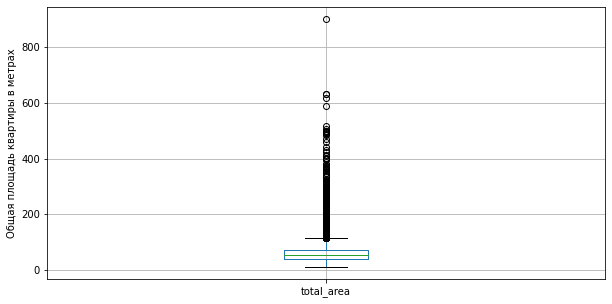

In [240]:
print('Диаграмма размаха общей площади квартиры')
df.boxplot(column = ['total_area'], figsize = (10,5), grid = True)
plt.ylabel('Общая площадь квартиры в метрах')
plt.show()

In [241]:
df['total_area'].describe()

count   23613.00
mean       60.34
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64

Отсечём чрезмерно выбивающиеся значения согласно распределению данных ящика с усами, площадь свыше 100 квадратных метров нам для дальнейшей статистики не интересна.

In [242]:
good_data = df.query('total_area < 100')

Диаграмма размаха общей площади квартиры после отсечения выбивающихся значений


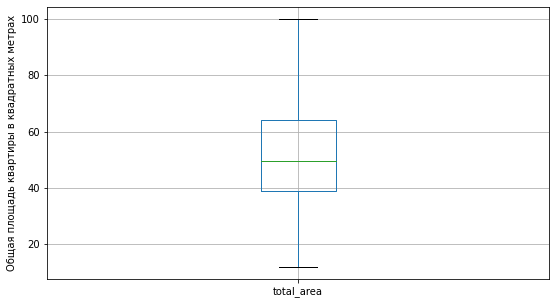

In [243]:
print('Диаграмма размаха общей площади квартиры после отсечения выбивающихся значений')
good_data.boxplot(column = ['total_area'], figsize = (9,5), grid = True)
plt.ylabel('Общая площадь квартиры в квадратных метрах')
plt.show()

Построим гистограмму.

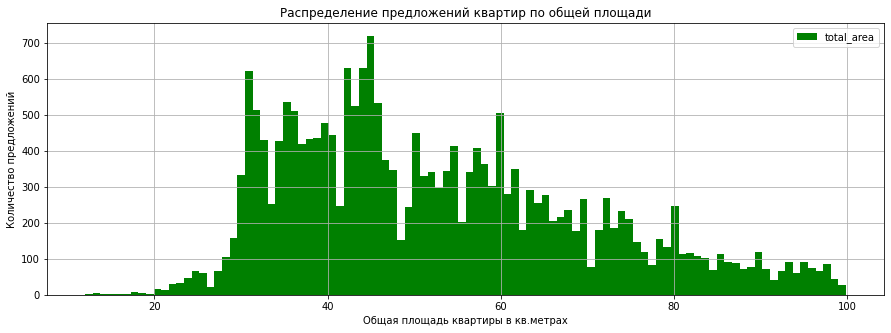

In [244]:
good_data.sort_values(by = 'total_area', 
                      ascending = True).plot(kind = 'hist', 
                                             y = 'total_area',
                                             title = 'Распределение предложений квартир по общей площади', 
                                             color = 'g',
                                             bins = 100, 
                                             figsize = (15,5), 
                                             grid = True)

plt.xlabel('Общая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

**Жилая площадь**

Диаграмма размаха жилой площади квартиры


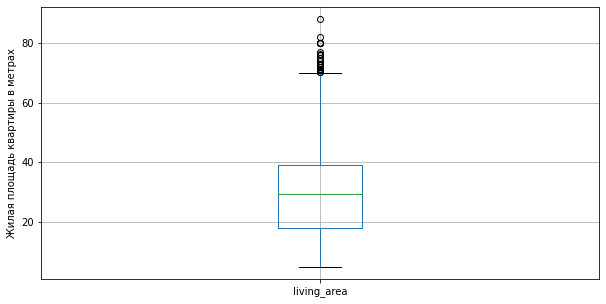

In [245]:
print('Диаграмма размаха жилой площади квартиры')
good_data.boxplot(column = ['living_area'],
                  figsize = (10,5),
                  grid = True)
plt.ylabel('Жилая площадь квартиры в метрах')
plt.show()

In [246]:
df['living_area'].describe()

count   21739.00
mean       34.47
std        22.04
min         5.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

Отсечём чрезмерно выбивающиеся значения согласно распределению данных ящика с усами, площадь свыше 60 квадратных метров нам для дальнейшей статистики не интересна.

In [247]:
good_data = good_data.query('living_area < 60')

Диаграмма размаха жилой площади квартиры после отсечения выбивающихся значений


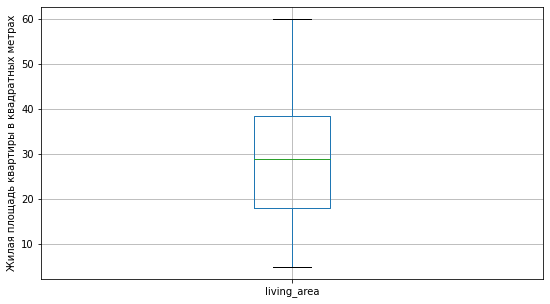

In [248]:
print('Диаграмма размаха жилой площади квартиры после отсечения выбивающихся значений')
good_data.boxplot(column = ['living_area'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Жилая площадь квартиры в квадратных метрах')
plt.show()

Построим гистограмму.

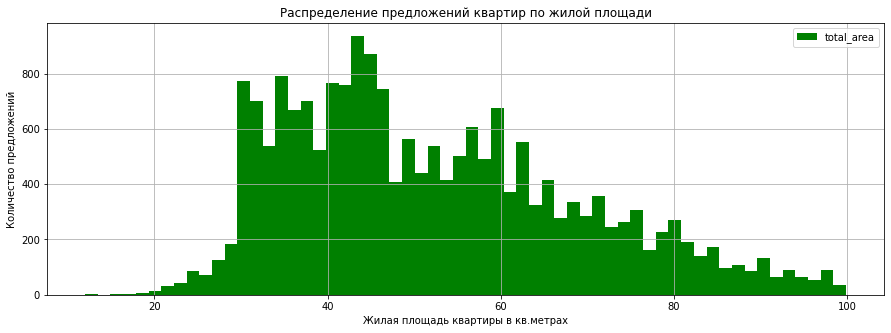

In [249]:
good_data.sort_values(by = 'living_area',
                      ascending = True).plot(kind = 'hist',
                                             y = 'total_area',
                                             title = 'Распределение предложений квартир по жилой площади', 
                                             color = 'g',
                                             bins = 60,
                                             figsize = (15,5), 
                                             grid=True)

plt.xlabel('Жилая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

**Площадь кухни**

Диаграмма размаха площади кухни


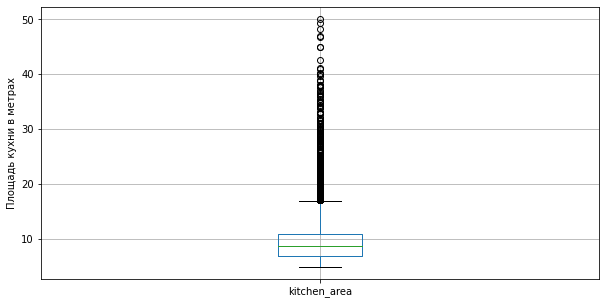

In [250]:
print('Диаграмма размаха площади кухни')
good_data.boxplot(column = ['kitchen_area'],
                  figsize = (10,5),
                  grid = True)
plt.ylabel('Площадь кухни в метрах')
plt.show()

In [251]:
df['kitchen_area'].describe()

count   23613.00
mean       10.34
std         5.66
min         5.00
25%         7.40
50%         9.00
75%        11.42
max       112.00
Name: kitchen_area, dtype: float64

Отсечём чрезмерно выбивающиеся значения согласно распределению данных ящика с усами, площадь свыше 50 квадратных метров нам для дальнейшей статистики не интересна.

In [252]:
good_data = good_data.query('kitchen_area < 50')

Диаграмма размаха площади кухни после отсечения выбивающихся значений


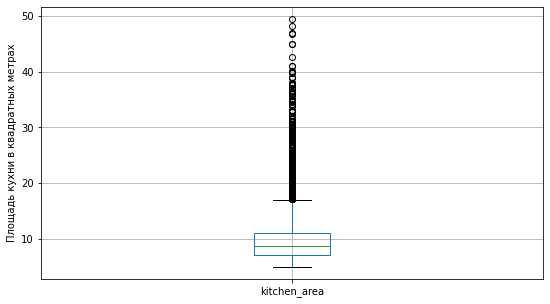

In [253]:
print('Диаграмма размаха площади кухни после отсечения выбивающихся значений')
good_data.boxplot(column = ['kitchen_area'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Площадь кухни в квадратных метрах')
plt.show()

Построим гистограмму.

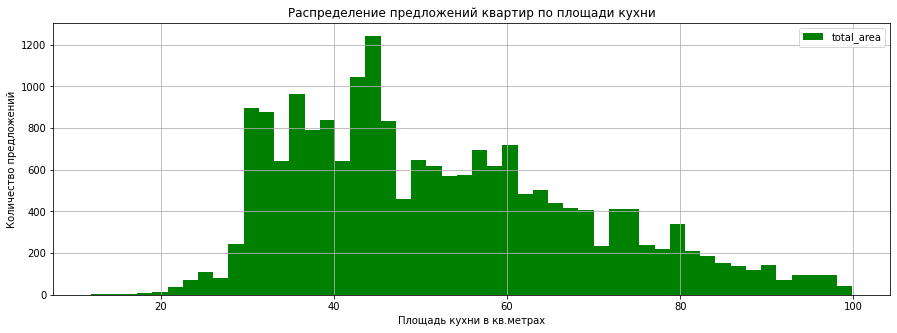

In [254]:
good_data.sort_values(by = 'kitchen_area',
                      ascending = True).plot(kind = 'hist',
                                             y = 'total_area',
                                             title = 'Распределение предложений квартир по площади кухни', 
                                             color = 'g',
                                             bins = 50,
                                             figsize = (15,5), 
                                             grid=True)

plt.xlabel('Площадь кухни в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

**Цена объекта**

Диаграмма размаха цены предложений


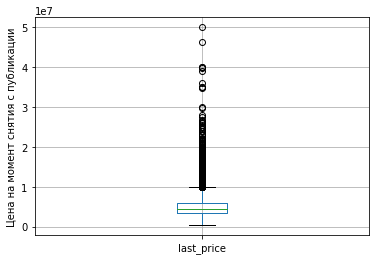

In [255]:
print('Диаграмма размаха цены предложений')
good_data.boxplot('last_price')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

In [256]:
df['last_price'].describe()

count       23613.00
mean      6540555.46
std      10901722.74
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6799000.00
max     763000000.00
Name: last_price, dtype: float64

Отбросим выбивающиеся значения по цене, т.к. они будут мешать при построении графика, а так же усложнят анализ и прочтение данных с гистограммы. Очевидно, что стоимость квартир свыше 9 млн. встречается редко в наших данных, отсечём лишнее.

In [257]:
good_data = good_data.query('last_price < 9000000')

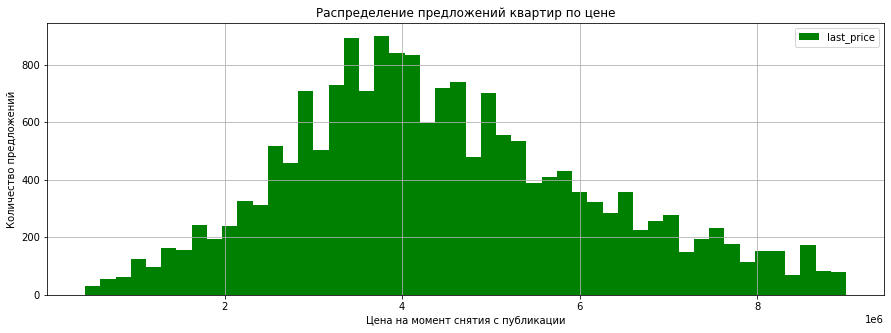

In [258]:
good_data.plot(kind = 'hist',
               y = 'last_price', 
               title = 'Распределение предложений квартир по цене', 
               color = 'g',
               grid = True, 
               bins = 50, 
               figsize = (15,5))
plt.ylabel('Количество предложений')
plt.xlabel('Цена на момент снятия с публикации')
plt.show()

Из графика хорошо виден ценовой сегмент квартир в районе 4 млн.руб.

**Количество комнат**

Диаграмма размаха цены предложений


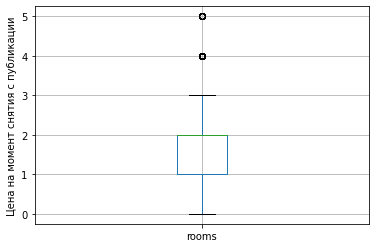

In [259]:
print('Диаграмма размаха цены предложений')
good_data.boxplot('rooms')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

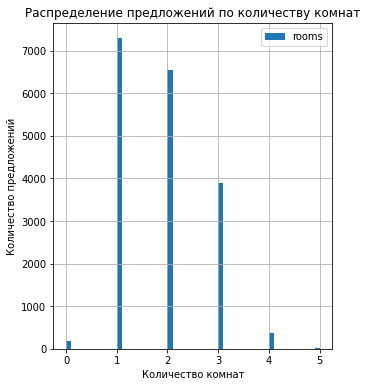

In [260]:
good_data.plot(kind = 'hist',
               y = 'rooms',
               title = 'Распределение предложений по количеству комнат',
               grid = True, 
               bins = 50, 
               figsize = (5,6))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

**Высота потолков**

Диаграмма размаха высоты потолков


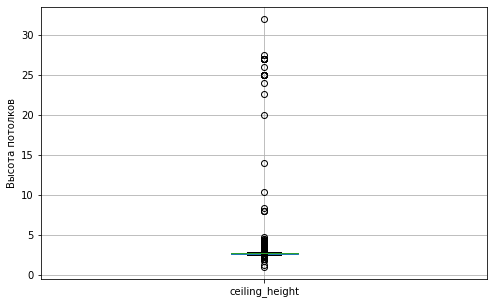

In [261]:
print('Диаграмма размаха высоты потолков')
good_data.boxplot(column = ['ceiling_height'],
                  figsize = (8,5),
                  grid = True)
plt.ylabel('Высота потолков')
plt.show()

Основываясь на графике "ящика с усами", отсечём квартиры с потолками свыше 2,9м, а так же ниже 2,4м.

In [262]:
good_data = good_data.query('ceiling_height < 2.9 and ceiling_height > 2.4')

Построим гистограмму.

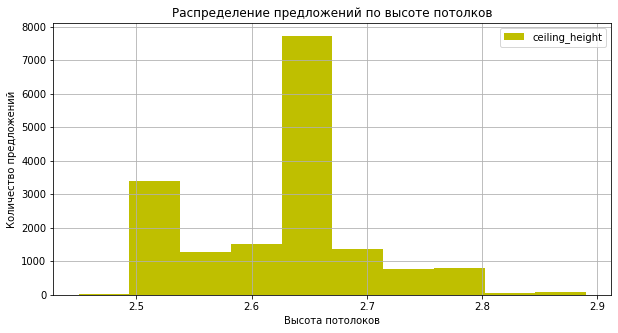

In [263]:
good_data.plot(kind = 'hist',
               y = 'ceiling_height',
               grid = True, 
               bins = 10, 
               figsize = (10,5),
               title = 'Распределение предложений по высоте потолков', 
               color = 'y')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')
plt.show()

**Вывод**


По результату проведённого анализа площади, цены, числа комнат и высоты потолков, однозначно можно сказать, что подавляющее большинство объявлений о продаже квартир составляют 1-2 комнатные квартиры в ценовом диапазоне 4 млн.руб и высотой потолков в 2,75 метра.

**Этаж квартиры**

Диаграмма размаха этажей


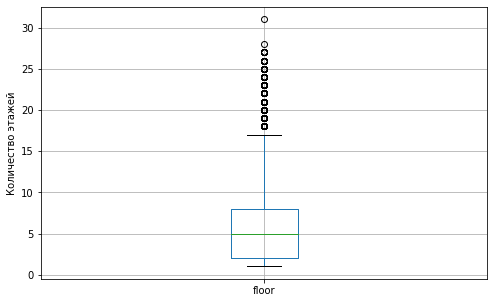

In [264]:
print('Диаграмма размаха этажей')
good_data.boxplot(column = ['floor'],
                  figsize = (8,5),
                  grid = True)
plt.ylabel('Количество этажей')
plt.show()

In [265]:
df['floor'].describe()

count   23613.00
mean        5.88
std         4.87
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

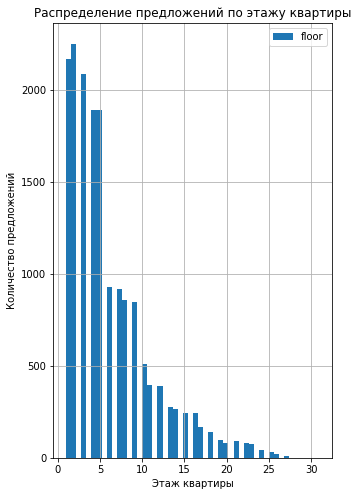

In [266]:
good_data.plot(kind = 'hist',
               y = 'floor',
               title = 'Распределение предложений по этажу квартиры',
               grid = True, 
               bins = 50, 
               figsize = (5,8))
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество предложений')
plt.show()

**Тип этажа квартиры («первый», «последний», «другой»)**

In [267]:
good_data['group'].value_counts()

Другой       12562
Последний     2280
Первый        2158
Name: group, dtype: int64

Построим гистограмму.

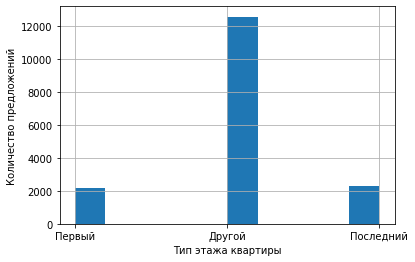

In [268]:
good_data['group'].hist()                                        
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество предложений')
plt.show()

Судя по количеству предложений, более актуальны квартиры на любом этаже кроме первого и последнего.

**Этаж квартиры**

Диаграмма размаха высоты потолков


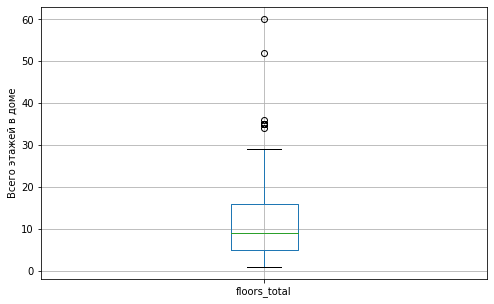

In [269]:
print('Диаграмма размаха высоты потолков')
good_data.boxplot(column = ['floors_total'],
                  figsize = (8,5),
                  grid = True)
plt.ylabel('Всего этажей в доме')
plt.show()

In [270]:
df['floors_total'].describe()

count   23613.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

Основываясь на графике "ящика с усами", отсечём количество этажей свыше 28 этажа.

In [271]:
good_data = good_data.query('floors_total < 28')

Диаграмма размаха общего количества этажей после отсечения выбивающихся значений


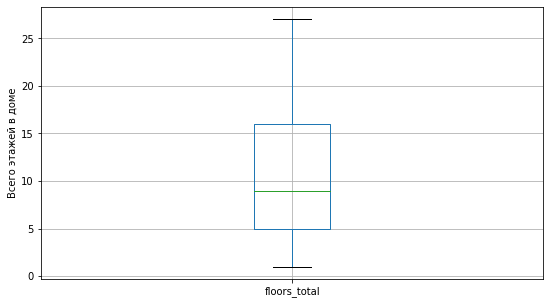

In [272]:
print('Диаграмма размаха общего количества этажей после отсечения выбивающихся значений')
good_data.boxplot(column = ['floors_total'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Всего этажей в доме')
plt.show()

Построим гистограмму.

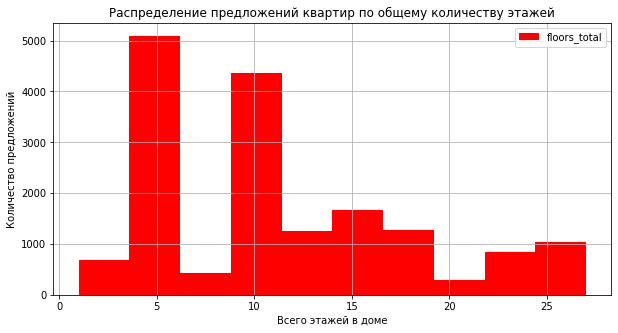

In [273]:
good_data.plot(kind = 'hist',
               y = 'floors_total', 
               title = 'Распределение предложений квартир по общему количеству этажей', 
               color = 'r',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Всего этажей в доме')
plt.show()

**Расстояние до центра города в метрах**

Диаграмма размаха расстояние до центра города в метрах


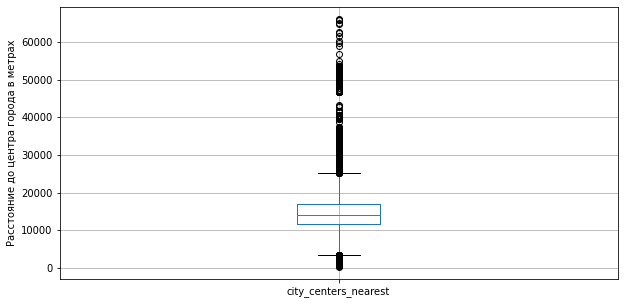

In [274]:
print('Диаграмма размаха расстояние до центра города в метрах')
good_data.boxplot(column = ['city_centers_nearest'], figsize = (10,5), grid = True)
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

In [275]:
df['city_centers_nearest'].describe()

count   18104.00
mean    14185.08
std      8614.13
min       181.00
25%      9233.75
50%     13093.00
75%     16287.00
max     65968.00
Name: city_centers_nearest, dtype: float64

Основываясь на графике "ящика с усами", отсечём расстояние до центра города в метрах свыше 28515 метров, а так же меньше 5278 метров.

In [276]:
good_data = good_data.query('city_centers_nearest > 5278 and city_centers_nearest < 28515')

Диаграмма размаха расстояние до центра города после отсечения выбивающихся значений


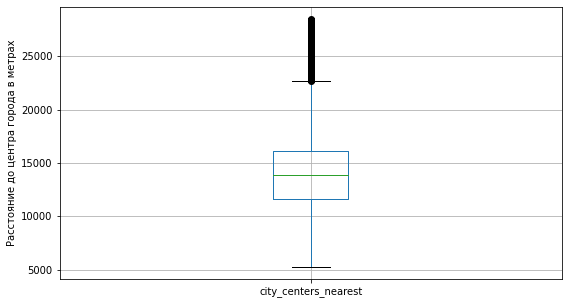

In [277]:
print('Диаграмма размаха расстояние до центра города после отсечения выбивающихся значений')
good_data.boxplot(column = ['city_centers_nearest'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

Построим гистограмму.

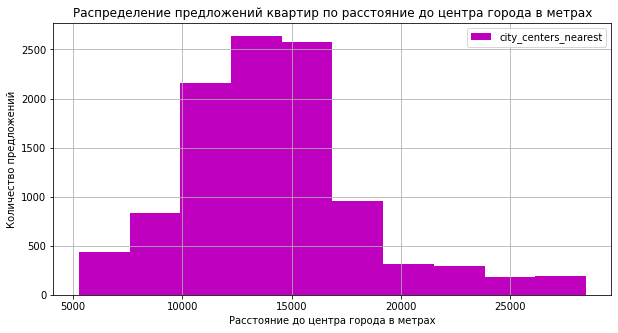

In [278]:
good_data.plot(kind = 'hist',
               y = 'city_centers_nearest', 
               title = 'Распределение предложений квартир по расстояние до центра города в метрах', 
               color = 'm',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Расстояние до центра города в метрах')
plt.show()

**Расстояние до ближайшего аэропорта**

Диаграмма размаха расстояние до ближайшего аэропорта


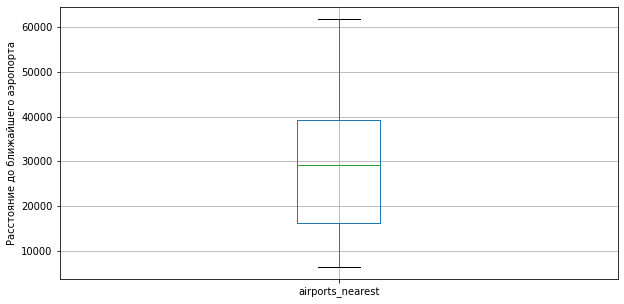

In [279]:
print('Диаграмма размаха расстояние до ближайшего аэропорта')
good_data.boxplot(column = ['airports_nearest'], figsize = (10,5), grid = True)
plt.ylabel('Расстояние до ближайшего аэропорта')
plt.show()

In [280]:
df['airports_nearest'].describe()

count   18080.00
mean    28789.60
std     12624.74
min      6450.00
25%     18575.75
50%     26727.50
75%     37242.50
max     84869.00
Name: airports_nearest, dtype: float64

Основываясь на графике "ящика с усами", отсечём расстояние до центра города в метрах свыше 28515 метров, а так же меньше 5278 метров.

In [281]:
good_data = good_data.query('airports_nearest > 10620 and airports_nearest < 65164')

Диаграмма размаха расстояние до центра города после отсечения выбивающихся значений


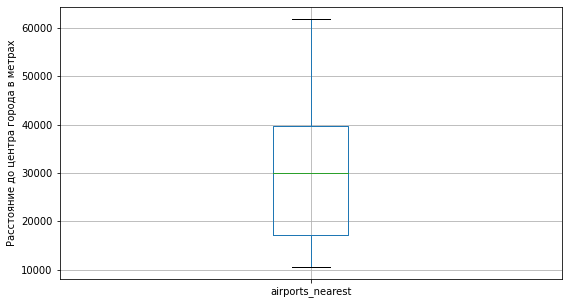

In [282]:
print('Диаграмма размаха расстояние до центра города после отсечения выбивающихся значений')
good_data.boxplot(column = ['airports_nearest'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

Построим гистограмму.

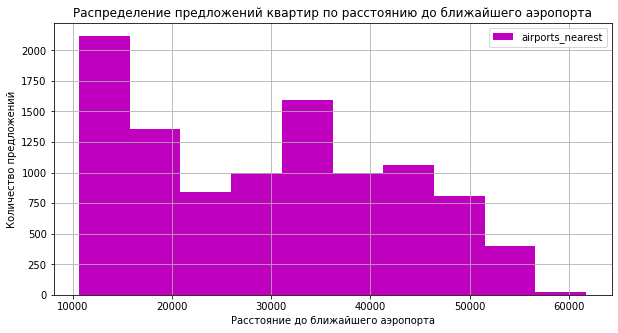

In [283]:
good_data.plot(kind = 'hist',
               y = 'airports_nearest', 
               title = 'Распределение предложений квартир по расстоянию до ближайшего аэропорта', 
               color = 'm',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.show()

**Расстояние до ближайшего парка**

Диаграмма размаха расстояние до ближайшего парка


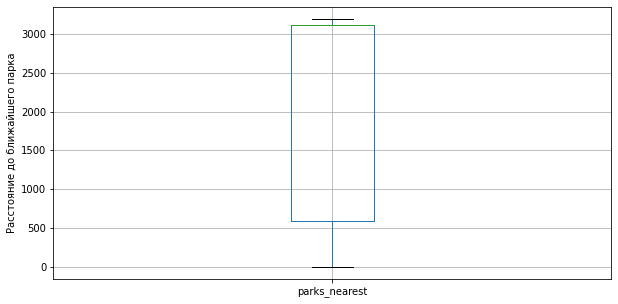

In [284]:
print('Диаграмма размаха расстояние до ближайшего парка')
good_data.boxplot(column = ['parks_nearest'], figsize = (10,5), grid = True)
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

Построим гистограмму.

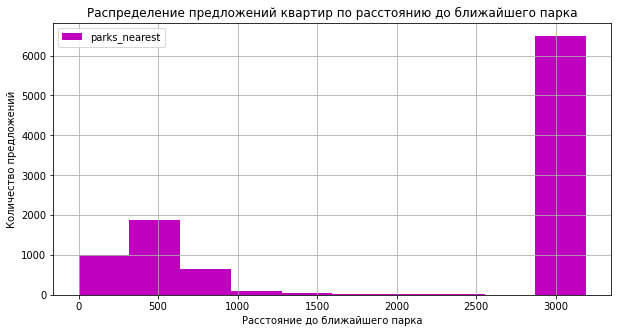

In [285]:
good_data.plot(kind = 'hist',
               y = 'parks_nearest', 
               title = 'Распределение предложений квартир по расстоянию до ближайшего парка', 
               color = 'm',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Расстояние до ближайшего парка')
plt.show()

**День и месяц публикации объявления**

In [286]:
df['years_exposition'].value_counts()

2018    8492
2017    8166
2019    2871
2016    2763
2015    1184
2014     137
Name: years_exposition, dtype: int64

Построим гистограмму.

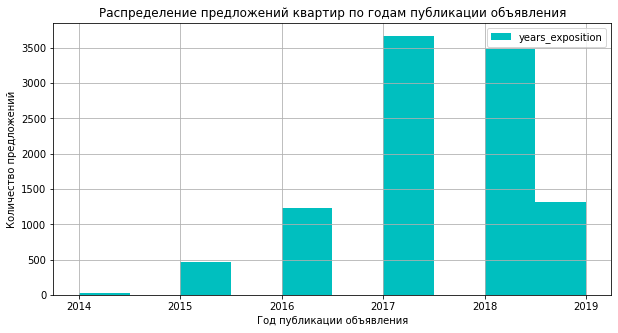

In [287]:
good_data.plot(kind = 'hist',
               y = 'years_exposition', 
               title = 'Распределение предложений квартир по годам публикации объявления', 
               color = 'c',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Год публикации объявления')
plt.show()

Очевидно, что количество предложений на рынке недвижимости было пиковым значением в 2017 и 2018 годах, а вот в 2019 количество предложений сократилось в 4 раза и вернулось на уровень 2016 года.

In [288]:
df['month_exposition'].sort_values().value_counts()

2     2637
3     2580
11    2364
4     2362
10    2111
9     1974
6     1752
8     1741
7     1690
12    1641
1     1496
5     1265
Name: month_exposition, dtype: int64

Построим гистограмму.

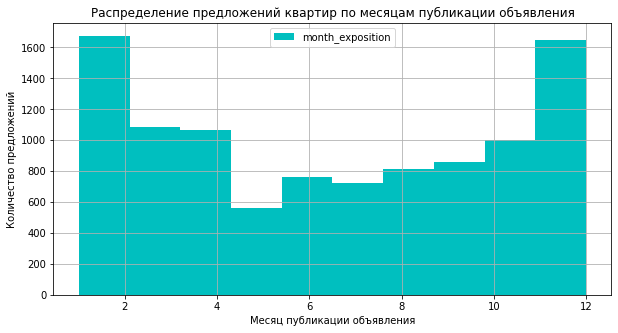

In [289]:
good_data.plot(kind = 'hist',
               y = 'month_exposition', 
               title = 'Распределение предложений квартир по месяцам публикации объявления', 
               color = 'c',
               grid = True, 
               bins = 10, 
               figsize = (10,5))
plt.ylabel('Количество предложений')
plt.xlabel('Месяц публикации объявления')
plt.show()

У количество предложений на рынке недвижимости в есть два пика с сентрября по ноябрь и с февраля по апрель, а вот количество предложений с мая по август август на 12% меньше.

**Время продажи квартиры**

Диаграмма размаха времени продажи квартиры


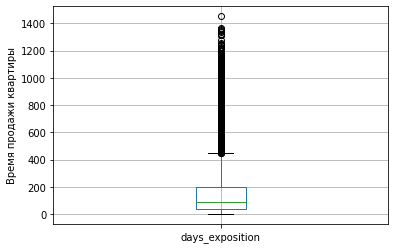

In [290]:
print('Диаграмма размаха времени продажи квартиры')
good_data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

Значение по количеству дней в продаже свыше 250 лучше отсечь, т.к. это редкие квартиры с нестандартной планировкой и такие квартиры могут продаваться очень долго, для статистики они нам не нужны, т.к. сильно меняют сренее значение по сроку продажи квартир.

In [291]:
good_data = good_data.query('days_exposition < 250')

In [292]:
df['days_exposition'].describe()

count   20441.00
mean      180.88
std       219.69
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Диаграмма размаха времени продажи квартиры после отсечения выбивающихся значений


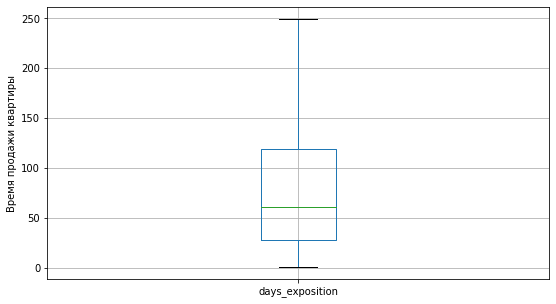

In [293]:
print('Диаграмма размаха времени продажи квартиры после отсечения выбивающихся значений')
good_data.boxplot(column = ['days_exposition'], 
                  figsize = (9,5), 
                  grid = True)
plt.ylabel('Время продажи квартиры')
plt.show()

Построим гистограмму.

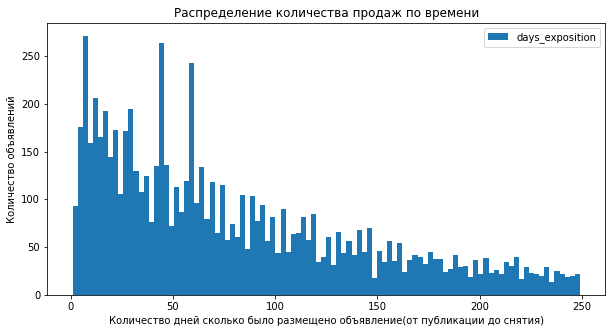

In [294]:
good_data.plot(kind = 'hist',
               y = 'days_exposition',
               title = 'Распределение количества продаж по времени', 
               bins = 100, 
               figsize = (10,5))
plt.xlabel('Количество дней сколько было размещено объявление(от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()

Медианное время продажи - 61 дней. 

Среднее время продажи - 79 день.

В основном квартиры продаются за срок в 100 дней. 

Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

### Факторы больше всего влияют на общую (полную) стоимость объекта

**Изучим, зависит цены от площади, числа комнат и жилой площади**

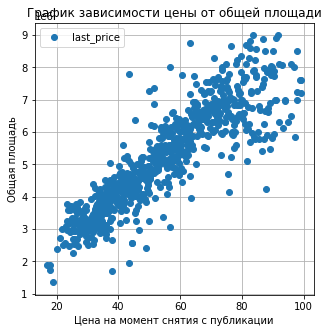

Корреляция цены и общей площади: 

            last_price  total_area
last_price        1.00        0.80
total_area        0.80        1.00 



In [295]:
(good_data.pivot_table(index = 'total_area', 
                       values = 'last_price')
     .plot(style = 'o', 
           grid = True, 
           figsize = (5, 5), 
           title = 'График зависимости цены от общей площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Общая площадь')
plt.show()
print('Корреляция цены и общей площади:','\n')
print(good_data.pivot_table(index = 'floor', values = ['total_area', 'last_price']).corr(),'\n')

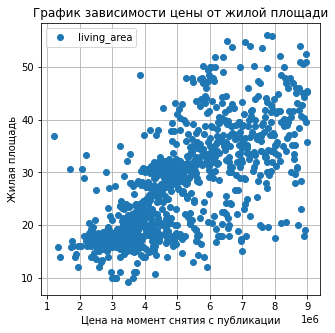

Корреляция цены и жилой площади: 

             last_price  living_area
last_price         1.00         0.35
living_area        0.35         1.00 



In [296]:
(good_data.pivot_table(index = 'last_price', 
                       values = 'living_area')
     .plot(style = 'o', 
           grid = True, 
           figsize = (5, 5), 
           title = 'График зависимости цены от жилой площади')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Жилая площадь')
plt.show()

print('Корреляция цены и жилой площади:','\n')
print(good_data.pivot_table(index = 'floor', values = ['living_area', 'last_price']).corr(),'\n')

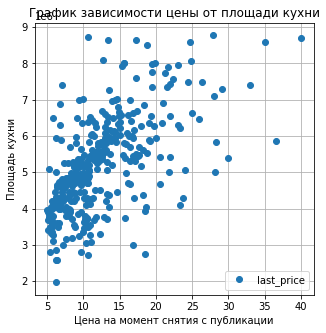

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area          1.00        0.32
last_price            0.32        1.00 



In [297]:
(good_data.pivot_table(index = 'kitchen_area', 
                       values = 'last_price')
     .plot(style = 'o', 
           grid = True, 
           figsize = (5, 5), 
           title = 'График зависимости цены от площади кухни')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Площадь кухни')
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(good_data.pivot_table(index = 'floor', values = ['kitchen_area', 'last_price']).corr(),'\n')

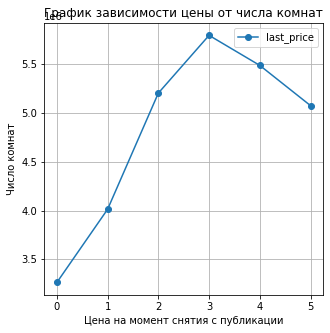

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00  -0.03
rooms            -0.03   1.00 



In [298]:
(good_data.pivot_table(index = 'rooms',
                       values = 'last_price')
     .plot(style = 'o-', 
           grid = True, 
           figsize = (5, 5), 
           title = 'График зависимости цены от числа комнат')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Число комнат')
plt.show()

print('Корреляция цены и числа комнат:','\n')
print(good_data.pivot_table(index = 'floor', values = ['rooms', 'last_price']).corr(),'\n')

**Вывод**

Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Жилая площадь и площадь кухни влияет на зависимость цены ниже, чем общая площадь. Число комнат влияет на цену по принципу: больше комнат - больше цена. Однако зависимость самая маленькая, по сравнению с другими параметрами.

**Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом**

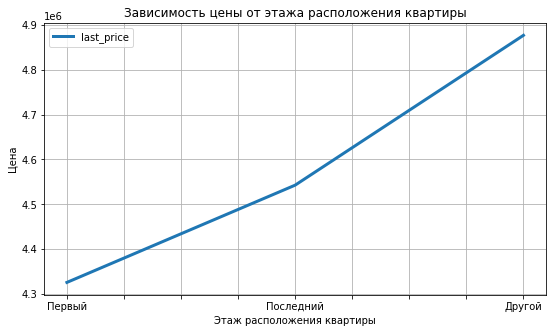

In [299]:
(good_data.pivot_table(index = 'group', 
                       values = 'last_price').sort_values(by = 'last_price', 
                                                          ascending = True)
     .plot(grid = True, 
           figsize = (9, 5), 
           linewidth = 3, 
           title = 'Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

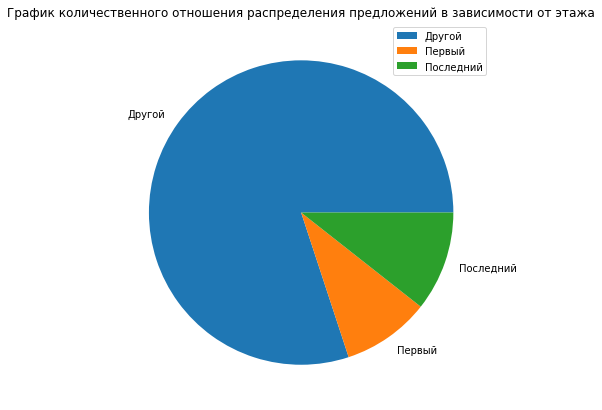

In [300]:
good_data.pivot_table(index = 'group',
                      values = 'last_price',
                      aggfunc = 'count').plot.pie(y = 'last_price', 
                                                figsize = (7,7), 
                                                label = '', 
                                                title = 'График количественного отношения распределения предложений в зависимости от этажа')
plt.show()

**Вывод**

Смотря на графики становится очевидно, что ценится любой другой этаж здания кроме первого и последнего, как по цене, так и по количеству предложений на рынке. 

**Изучим зависимость цены от даты размещения: дня недели, месяца и года**

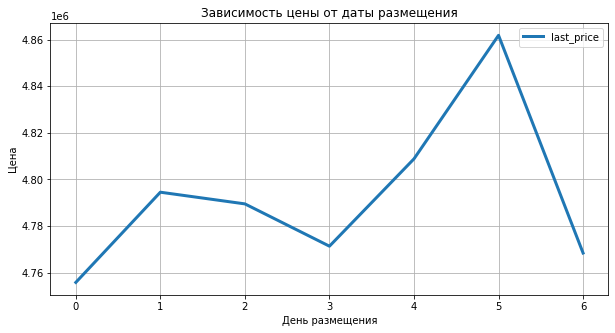

In [301]:
good_data.pivot_table(index = 'day_of_week_exposition', 
                      values = ['last_price']).plot(grid = True, 
                                                    figsize = (10, 5),
                                                    linewidth = 3,
                                                    title = 'Зависимость цены от даты размещения')

plt.xlabel('День размещения')
plt.ylabel('Цена')
plt.show()

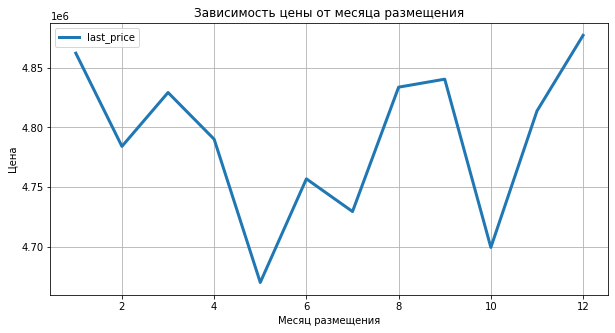

In [302]:
good_data.pivot_table(index = 'month_exposition', 
                      values = ['last_price']).plot(grid = True, 
                                                    figsize = (10, 5),
                                                    linewidth = 3, 
                                                    title = 'Зависимость цены от месяца размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')
plt.show()

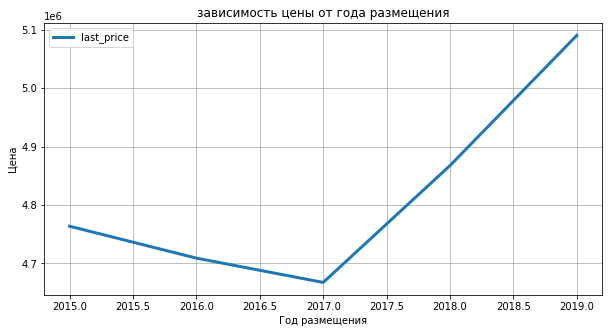

In [303]:
good_data.pivot_table(index = 'years_exposition', 
                      values = ['last_price']).plot(grid = True,
                                                    figsize = (10, 5),
                                                    linewidth = 3,
                                                    title = 'зависимость цены от года размещения')
     
plt.xlabel('Год размещения')
plt.ylabel('Цена')
plt.show()

**Вывод**

Удивительно, но объявления размещённые до четверга имеют большую цену, чем в другие дни недели. На графике помесячного размещения объявлений хорошо просматирваются два падения - это середина и конец года, в эти месяцы лучше квартиры не продавать, т.к. средняя стоимость ранка будет ниже чем в другие месяцы. По годовой тенденции наблюдается падение в стоимости жилья в 2015-2017 годах и резкий взлёт стоимости начиная с 2018 года, что вызвано скорей всего большим спросом на рынке недвижимости.

**Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [304]:
data_top_10 = df.pivot_table(index = 'locality_name', 
                               values = 'first_day_exposition', 
                               aggfunc = 'count').sort_values(by = 'first_day_exposition', 
                                                              ascending = False).head(10)
data_top_10.columns = ['number_of_ads']
data_top_10.reset_index()

,locality_name,number_of_ads
0,санкт-петербург,15651
1,посёлок мурино,552
2,посёлок шушары,439
3,всеволожск,398
4,пушкин,369
5,колпино,338
6,посёлок парголово,327
7,гатчина,307
8,деревня кудрово,299
9,выборг,237


**Вывод**

Очевидный лидер по количеству объявлений это Санкт-Петербург, остальные неселенные пункты в топ-10 расположены по области города примерно с равным количеством объявлений.




**Посчитаем среднюю цену квадратного метра в этих населённых пунктах**

In [305]:
data_top_10['cost_per_meter_median'] = df.pivot_table(index = 'locality_name', 
                                                    values = 'price_per_square_meter', 
                                                    aggfunc = 'median')
data_top_10_s = data_top_10.style.format({'cost_per_meter_median':'{:.2f} ₽'})

In [306]:
data_top_10_s

,number_of_ads,cost_per_meter_median
locality_name,,
санкт-петербург,15651,104774.54 ₽
посёлок мурино,552,86059.29 ₽
посёлок шушары,439,76829.27 ₽
всеволожск,398,65789.47 ₽
пушкин,369,100000.00 ₽
колпино,338,74723.75 ₽
посёлок парголово,327,91642.86 ₽
гатчина,307,67796.61 ₽
деревня кудрово,299,91860.47 ₽


**Вывод**

По средней стоимости за квадратный метр жилья можно сказать, что низкое количество объявлений не сильно влияет на цену кв.метра, так например Пушкин и посёлок Парголово имеют практически ту же цену в 100 т.р. за кв. метр как и жил.площадь в Санкт-Петербурге.

Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья

In [307]:
(data_top_10_s
 .highlight_max(color = 'red', 
                subset = 'cost_per_meter_median').highlight_min(color = 'yellowgreen', 
                                                              subset = 'cost_per_meter_median')
)

,number_of_ads,cost_per_meter_median
locality_name,,
санкт-петербург,15651,104774.54 ₽
посёлок мурино,552,86059.29 ₽
посёлок шушары,439,76829.27 ₽
всеволожск,398,65789.47 ₽
пушкин,369,100000.00 ₽
колпино,338,74723.75 ₽
посёлок парголово,327,91642.86 ₽
гатчина,307,67796.61 ₽
деревня кудрово,299,91860.47 ₽


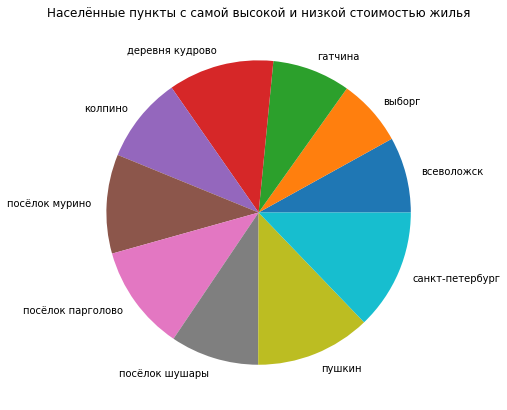

In [308]:
data_top_10.pivot_table(index = 'locality_name',
                        values = 'cost_per_meter_median').plot.pie(y = 'cost_per_meter_median', 
                                                                 figsize = (7,7), 
                                                                 legend = False, 
                                                                 label = '', 
                                                                 title = 'Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()

**Вывод**

Самая низкая стоимость жилья из нашей топ-10 расположена в Выборге и Всеволожске, а на первом месте расположился Санкт-Петребург, с незначительным отрывом от Пушкина.

**Изучим предложения квартир: выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр**

In [309]:
local_spb = df.loc[df['locality_name'] == 'санкт-петербург']

In [310]:
local_spb['city_centers_nearest_in_km'].describe()

count   15591.00
mean       11.58
std         4.85
min         0.00
25%         8.00
50%        12.00
75%        15.00
max        29.00
Name: city_centers_nearest_in_km, dtype: float64

Диаграмма размаха удалённости от центра


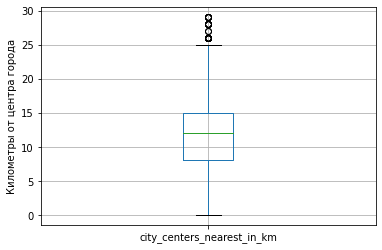

In [311]:
print('Диаграмма размаха удалённости от центра')
local_spb.boxplot('city_centers_nearest_in_km')

plt.ylabel('Километры от центра города')
plt.show()

In [312]:

local_spb = local_spb.loc[local_spb['city_centers_nearest_in_km'] < 24]

**Вывод**

Город Санкт-Петрбург очень большой, но даже для него расстояние больше 24 км от центра не может считаться центром города, по-этому мы отсекли мешающие статисткие и анализу данные.

**Посчитаем среднюю цену для каждого километра**

In [313]:
local_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,ceiling _height,day_of_week_exposition,month_exposition,years_exposition,price_per_square_meter,group,city_centers_nearest_in_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,NaN,NaN,3,3,2019,120370.37,Другой,16.00
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574.00,558.00,2.70,3,8,2015,92785.71,Другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.00,424.00,2.70,4,7,2015,408176.10,Другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.00,121.00,NaN,1,6,2018,100000.00,Другой,8.00
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0,NaN,NaN,2.70,3,4,2019,110544.69,Другой,12.00


In [314]:
mean_cost_per_in_km = local_spb['last_price'].sum()/local_spb['city_centers_nearest_in_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_cost_per_in_km))

Средняя цена для каждого километра составляет 702076 ₽


**Построим график: он будет показывать, как цена зависит от удалённости от центра. А так же определим границу центральной зоны.**

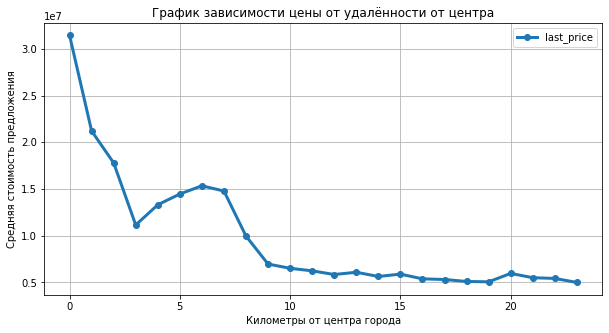

In [315]:
local_spb.pivot_table(index = 'city_centers_nearest_in_km', 
                      values = 'last_price', 
                      aggfunc = 'mean').plot(figsize = (10,5), 
                                             grid = True,
                                             style='o-',
                                             linewidth = 3, 
                                             title = 'График зависимости цены от удалённости от центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

**Вывод**

Очевидно, что падение цены на графике сильно изменилось при достижении значения в 9-10 км, это говорит нам, что центральным районом можно считать все квартиры в удалении от центра не более чем на 10 км.

### Общий вывод

Подводя итог проделанной работы по подготовке данных к анализу мы столкнулись с большим количеством пропусков в колонках, которые могут влиять как на среднюю цену предлодения квартир на рынке, так и на анализ выделенных групп в частности. Тем не менее какие-то данные мы заполнили средним значением дабы не терять основной массив статистичесих данны, а некоторые данные оставили без изменений с пропущенными значениями. По результату проделанной работы по обработке и анализу недостающих и "битых" данных, несомненно надо обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на крректность выгрузки данных из программы. Ошибок связанных с человеческим фактором(опечаток и пр.) довольно мало, что сильно облегчило труд по предобработке материала для анализа.

После избавления нашей базы от 'мусорных' и выбивающихся значений мы выполнили такие операции как подсчёт средней стоимости квадратного метра жилья, стоимость каждого километра удаления от центра, выделили сегмент квартир расположенных в центре и проанализировали их параметры, а так же вывели статистику по скорости продажи объявления с даты его размещения, факторы влияющие на это и проанализировали статистику продаж в зависимости от периода размещения объявления.

Для большей наглядности при анализе использовались графики, из которых лего можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург", несмотря на это средняя цена квадратного метра приблизительно такая же как и по области. Тенденция рынка такова, что начиная с 2017 года активно растёт спрос на жильё за пределами центра Петербурга, при этом люди в основной своей массе стараются найти предложения квартир на любом этаже за исключением первого и последнего, за частую это высотные здания и новостройки. 

В итоге в большинстве случаев покупки жилья люди выбирают 1-2 комнатные квартиры в высотной новостройке по периметру города Санкт-Петребург, с средней стоимостью в 70 т.р. за кв.метр. и высотой потолков 2,65. Таким образом можно сделать вывод о том, что количество таких домов и соответственно предложений будет расти в след за ценой в отличии от цен на жильё расположенного по центру исторического района города в невысоких домах из старого фонда.